Competition link https://www.kaggle.com/competitions/cmi-detect-behavior-with-sensor-data/data

In [1]:
import torch
import pandas as pd

torch.__version__

'2.7.1+cu126'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
X_train = pd.read_csv("data/cmi-detect-behavior-with-sensor-data/train.csv")
X_train.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Columns: 341 entries, row_id to tof_5_v63
dtypes: float64(332), int64(1), object(8)
memory usage: 1.5+ GB


In [10]:
X_train.columns

Index(['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject',
       'orientation', 'behavior', 'phase', 'gesture', 'acc_x',
       ...
       'tof_5_v54', 'tof_5_v55', 'tof_5_v56', 'tof_5_v57', 'tof_5_v58',
       'tof_5_v59', 'tof_5_v60', 'tof_5_v61', 'tof_5_v62', 'tof_5_v63'],
      dtype='object', length=341)

In [11]:
acc_cols = []
rot_cols = []
thm_cols = []
tof_cols = []
for i in X_train.columns:
    if i[:3] == "acc":
        acc_cols.append(i)
    elif i[:3] == "rot":
        rot_cols.append(i)
    elif i[:3] == "thm":
        thm_cols.append(i)
    elif i[:3] == "tof":
        tof_cols.append(i)

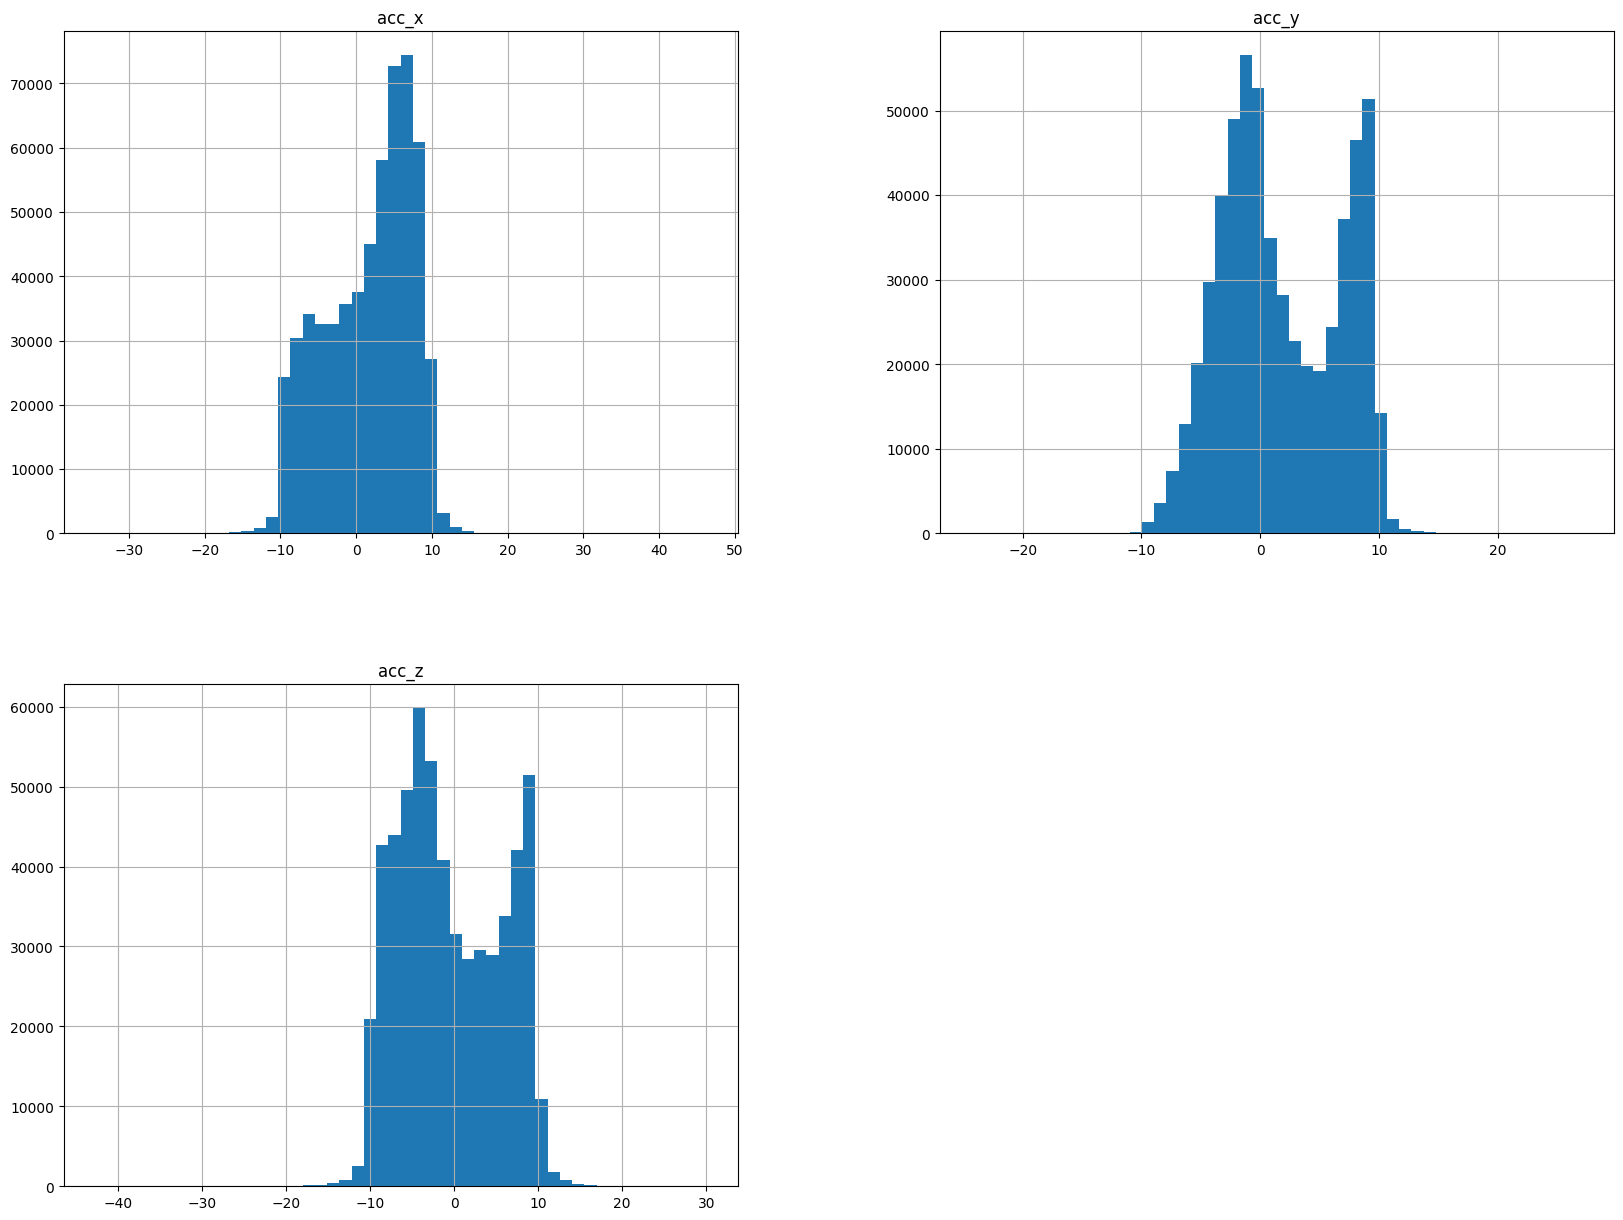

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train[acc_cols].hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
y_train = X_train[["sequence_type", "gesture"]]

In [16]:
X_train = X_train.drop(columns=["row_id", "subject", "behavior", "orientation", "phase", "sequence_type", "gesture"])

In [17]:
len(X_train[X_train["sequence_id"]=="SEQ_000007"])

57

In [18]:
X_train_np = X_train.values
y_train_np = y_train.values.reshape(-1, 2)

In [19]:
X_train_np.shape, y_train_np.shape

((574945, 334), (574945, 2))

In [21]:
from torchvision import transforms

In [22]:
acc_transform = transforms.Compose([
    transforms.Lambda(lambda x: x.reshape(-1, 3)),
    transforms.Lambda(lambda x: torch.from_numpy(x).float()),
])